# Exploración dataset imdb

Notebook inicial para explorar los dataset de películas de imdb. Han sido descargados de [Kaggle](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset)

[imdb](https://www.imdb.com/interfaces/)

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [80]:
!ls ./data

IMDb movies.csv ratings.tsv     titles.tsv


In [81]:
# Cargamos el dataset de películas
df = pd.read_csv('./data/IMDb movies.csv')

/Users/antoniocantos/opt/anaconda3/envs/Master/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [82]:
df.shape

(85855, 22)

### Exploración del dataset

In [84]:
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [85]:
# Comprobamos los valores nulos del dataset
df.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

Nos vamos a quedar con las columnas title, year, genre, duration, country, description, avg_vote y votes

In [91]:
df = df[['title', 'year', 'genre', 'duration', 'country', 'description', 'avg_vote', 'votes']]

In [92]:
df.head()

,title,year,genre,duration,country,description,avg_vote,votes
0,Miss Jerry,1894,Romance,45,USA,The adventures of a female reporter in the 1890s.,5.9,154
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,True story of notorious Australian outlaw Ned ...,6.1,589
2,Den sorte drøm,1911,Drama,53,"Germany, Denmark",Two men of high rank are both wooing the beaut...,5.8,188
3,Cleopatra,1912,"Drama, History",100,USA,The fabled queen of Egypt's affair with Roman ...,5.2,446
4,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Loosely adapted from Dante's Divine Comedy and...,7.0,2237


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        85855 non-null  object 
 1   year         85855 non-null  object 
 2   genre        85855 non-null  object 
 3   duration     85855 non-null  int64  
 4   country      85791 non-null  object 
 5   description  83740 non-null  object 
 6   avg_vote     85855 non-null  float64
 7   votes        85855 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 5.2+ MB


Comenzamos a limpiar las columnas. Vemos que la columna year es de tipo objeto (string) cuando debería de ser de tipo entero.

In [94]:
df.year.isnull().sum()

0

In [96]:
df[df.year == 'TV Movie 2019'].year

83917    TV Movie 2019
Name: year, dtype: object

In [111]:
# Vemos que al menos hay un valor que es un string, por lo que procedemos a limpiar el dataset, primero ponemos 
# los valores a NaN

df.year = df.year.apply(lambda x: x if str(x).isdigit() else np.NaN)

In [113]:
df.year.dropna()

0        1894
1        1906
2        1911
3        1912
4        1911
         ... 
85850    2020
85851    2020
85852    2019
85853    2019
85854    2019
Name: year, Length: 85854, dtype: object

Como podemos observar, sólo teniamos una fila con valor no numérico. Pero esto sirve por si hubiera más, calculamos su media y desviación típica, para asignarlo al valor null

In [114]:
df.year.dropna().astype(int).describe()

count    85854.000000
mean      1993.500594
std         24.216405
min       1894.000000
25%       1979.000000
50%       2003.000000
75%       2013.000000
max       2020.000000
Name: year, dtype: float64

<AxesSubplot:>

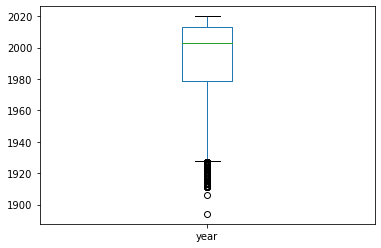

In [115]:
df.year.dropna().astype(int).plot(kind='box')

Asignamos la media a los valores nulos

In [116]:
df.year.fillna(df.year.dropna().astype(int).median(), inplace=True)

In [118]:
df.year = df.year.astype(int)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        85855 non-null  object 
 1   year         85855 non-null  int64  
 2   genre        85855 non-null  object 
 3   duration     85855 non-null  int64  
 4   country      85791 non-null  object 
 5   description  83740 non-null  object 
 6   avg_vote     85855 non-null  float64
 7   votes        85855 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 5.2+ MB


Nos falta por limpiar la columna país, en la cual le asignaremos Unknown, y la columna description en la cual le asignaremos una cadena vacia.

In [120]:
df.country.fillna('Unknown', inplace=True)

In [121]:
df.description.fillna('', inplace=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        85855 non-null  object 
 1   year         85855 non-null  int64  
 2   genre        85855 non-null  object 
 3   duration     85855 non-null  int64  
 4   country      85855 non-null  object 
 5   description  85855 non-null  object 
 6   avg_vote     85855 non-null  float64
 7   votes        85855 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 5.2+ MB


In [135]:
df[df.duration > 600].head()

,title,year,genre,duration,country,description,avg_vote,votes
38038,"Out 1, noli me tangere",1971,"Drama, Mystery",729,France,"Following the May 1968 civil unrest in France,...",7.8,1126
85057,La flor,2016,"Drama, Fantasy, Musical",808,Argentina,"A film in six episodes, connected by the same ...",7.7,473


### Visualización

Ya tenemos algunas de las columnas limpias, procedemos a visualizar los datos de algunas de las columnas.

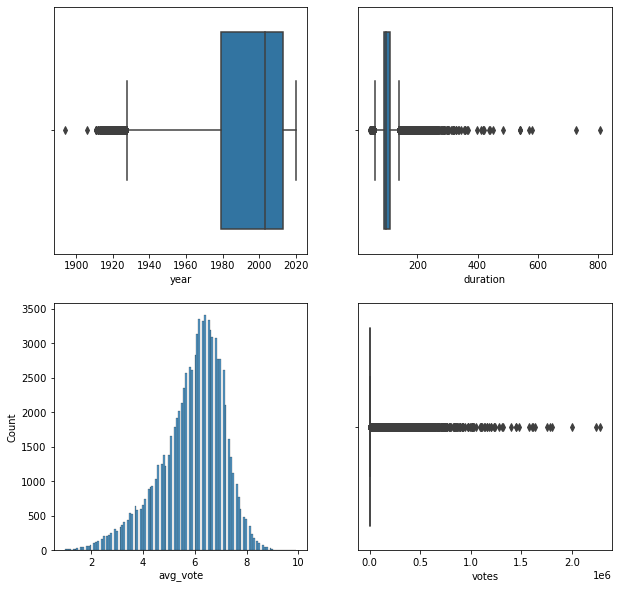

In [144]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(x=df.year, ax=ax[0, 0])
sns.boxplot(x=df.duration, ax=ax[0, 1])
sns.histplot(x=df.avg_vote, ax=ax[1, 0])
sns.boxplot(x=df.votes, ax=ax[1, 1])

plt.show()

In [32]:
df[df['genres'] == '\\N'].sort_values(by='num_votes', ascending=False)['num_votes']

254773    2076
254768    1594
254763    1132
254761    1025
169012     768
          ... 
102862       5
102479       5
102095       5
101158       5
266534       5
Name: num_votes, Length: 10176, dtype: int64

Guardamos el dataset que hemos limpiado.

In [145]:
df.to_csv('./data/movies_clean.csv', index=False, header=True)

### Generación de nuevas columnas

Se van a crear una serie de columnas para segmentar un poco más los datos.

1. Creación de una nueva columna llamada epoca (época), en la cual tendrá tres posibles valores:
    - Actual, desde el año 2000 hasta hoy
    - Intermedio, desde el año 1970 hasta 1999
    - Clásica, desde 1900 hasta 1969
2. Creación de una nueva columna llamada duración, en la cual tendrá tres posibles valores:
    - Corta, con un máximo de 90 minutos
    - Normal, entre 91 y 120 minutos
    - Larga, desde 121 minutos en adelante.
3. División de los géneros en tres subcategorias. En el caso de que una película tenga en la columna genres un sólo género, el resto se pondrá unknown.
    - genre_1
    - genre_2
    - genre_3
4. La última columna a crear indicará si la película es:
    - Conocida
    - Normal
    - Poco conocida
    

Pero antes de generar las columnas, vamos a eliminear las películas con menos de 1000 votos. Normalmente películas con pocos votos nos puede indicar que el acceso actual a esas películas es muy difícil.

In [147]:
df.votes.describe().apply(lambda x: format(x, 'f'))

count      85855.000000
mean        9493.489605
std        53574.359543
min           99.000000
25%          205.000000
50%          484.000000
75%         1766.500000
max      2278845.000000
Name: votes, dtype: object

In [148]:
# Eliminamos del dataframe las películas con menos de 1000 votos
df = df[df.votes >= 1000]

In [149]:
df.shape

(29374, 8)

Ahora tenemos 29374 películas.

In [150]:
df.head()

,title,year,genre,duration,country,description,avg_vote,votes
4,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Loosely adapted from Dante's Divine Comedy and...,7.0,2237
11,Fantômas - À l'ombre de la guillotine,1913,"Crime, Drama",54,France,Inspector Juve is tasked to investigate and ca...,7.0,1944
13,Juve contre Fantômas,1913,"Crime, Drama",61,France,In Part Two of Louis Feuillade's 5 1/2-hour ep...,7.0,1349
16,Le mort qui tue,1913,"Crime, Drama, Mystery",90,France,After a body disappears from inside the prison...,7.0,1050
18,Lo studente di Praga,1913,"Drama, Fantasy, Horror",85,Germany,"Balduin, a student of Prague, leaves his royst...",6.5,1768


### creación de nuevas columnas en el dataset

Se van a crear una serie de columnas para segmentar un poco más los datos.

1. Creación de una nueva columna llamada epoca (época), en la cual tendrá tres posibles valores:
    - Actual, desde el año 2000 hasta hoy
    - Intermedio, desde el año 1970 hasta 1999
    - Clásica, desde 1900 hasta 1969
2. Creación de una nueva columna llamada duración, en la cual tendrá tres posibles valores:
    - Corta, con un máximo de 90 minutos
    - Normal, entre 91 y 120 minutos
    - Larga, desde 121 minutos en adelante.
3. División de los géneros en tres subcategorias. En el caso de que una película tenga en la columna genres un sólo género, el resto se pondrá unknown.
    - genre_1
    - genre_2
    - genre_3
4. La última columna a crear indicará si la película es:
    - Conocida
    - Normal
    - Poco conocida

In [151]:
def set_time(year):
    if year <= 1979:
        return 'Classic'
    elif year < 2000:
        return 'Middle'
    else:
        return 'Current'

df['time'] = df.year.apply(set_time)

In [152]:
df.head()

,title,year,genre,duration,country,description,avg_vote,votes,time
4,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,Classic
11,Fantômas - À l'ombre de la guillotine,1913,"Crime, Drama",54,France,Inspector Juve is tasked to investigate and ca...,7.0,1944,Classic
13,Juve contre Fantômas,1913,"Crime, Drama",61,France,In Part Two of Louis Feuillade's 5 1/2-hour ep...,7.0,1349,Classic
16,Le mort qui tue,1913,"Crime, Drama, Mystery",90,France,After a body disappears from inside the prison...,7.0,1050,Classic
18,Lo studente di Praga,1913,"Drama, Fantasy, Horror",85,Germany,"Balduin, a student of Prague, leaves his royst...",6.5,1768,Classic


In [153]:
# Creación de la columna duración (length)

def set_length(minutes):
    if minutes <= 90:
        return 'Short'
    elif minutes > 90 and minutes <= 120:
        return 'Normal'
    else:
        return 'Long'
    
df['length'] = df.duration.apply(set_length)

In [154]:
df.head()

,title,year,genre,duration,country,description,avg_vote,votes,time,length
4,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,Classic,Short
11,Fantômas - À l'ombre de la guillotine,1913,"Crime, Drama",54,France,Inspector Juve is tasked to investigate and ca...,7.0,1944,Classic,Short
13,Juve contre Fantômas,1913,"Crime, Drama",61,France,In Part Two of Louis Feuillade's 5 1/2-hour ep...,7.0,1349,Classic,Short
16,Le mort qui tue,1913,"Crime, Drama, Mystery",90,France,After a body disappears from inside the prison...,7.0,1050,Classic,Short
18,Lo studente di Praga,1913,"Drama, Fantasy, Horror",85,Germany,"Balduin, a student of Prague, leaves his royst...",6.5,1768,Classic,Short


In [155]:
df.votes.describe().apply(lambda x: format(x, 'f'))

count      29374.000000
mean       27087.164533
std        88986.925090
min         1000.000000
25%         1686.250000
50%         3564.000000
75%        13139.500000
max      2278845.000000
Name: votes, dtype: object

In [156]:
# Decimos que menos de 3000 votos la película no es conocida. Entre 3000 y 15000 normal. y por encima de 15000 votos
# la película es conocida
def film_known(votes):
    if(votes <= 3000):
        return 'Unknown'
    elif votes < 15000:
        return 'Normal'
    else:
        return 'Known'
    
df['known'] = df.votes.apply(film_known)

In [157]:
df.head()

,title,year,genre,duration,country,description,avg_vote,votes,time,length,known
4,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,Classic,Short,Unknown
11,Fantômas - À l'ombre de la guillotine,1913,"Crime, Drama",54,France,Inspector Juve is tasked to investigate and ca...,7.0,1944,Classic,Short,Unknown
13,Juve contre Fantômas,1913,"Crime, Drama",61,France,In Part Two of Louis Feuillade's 5 1/2-hour ep...,7.0,1349,Classic,Short,Unknown
16,Le mort qui tue,1913,"Crime, Drama, Mystery",90,France,After a body disappears from inside the prison...,7.0,1050,Classic,Short,Unknown
18,Lo studente di Praga,1913,"Drama, Fantasy, Horror",85,Germany,"Balduin, a student of Prague, leaves his royst...",6.5,1768,Classic,Short,Unknown


In [159]:
# Generamos una tupla de tres elementos para el género
    
df['genre_1'] = df.genre.apply(lambda x: x.split(', ')[0])
df['genre_2'] = df.genre.apply(lambda x: x.split(', ')[1] if len(x.split(', ')) > 1 else x.split(', ')[0])
df['genre_3'] = df.genre.apply(lambda x: x.split(', ')[2] if len(x.split(', ')) > 2 else x.split(', ')[0])

In [160]:
df.head()

,title,year,genre,duration,country,description,avg_vote,votes,time,length,known,genre_1,genre_2,genre_3
4,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,Classic,Short,Unknown,Adventure,Drama,Fantasy
11,Fantômas - À l'ombre de la guillotine,1913,"Crime, Drama",54,France,Inspector Juve is tasked to investigate and ca...,7.0,1944,Classic,Short,Unknown,Crime,Drama,Crime
13,Juve contre Fantômas,1913,"Crime, Drama",61,France,In Part Two of Louis Feuillade's 5 1/2-hour ep...,7.0,1349,Classic,Short,Unknown,Crime,Drama,Crime
16,Le mort qui tue,1913,"Crime, Drama, Mystery",90,France,After a body disappears from inside the prison...,7.0,1050,Classic,Short,Unknown,Crime,Drama,Mystery
18,Lo studente di Praga,1913,"Drama, Fantasy, Horror",85,Germany,"Balduin, a student of Prague, leaves his royst...",6.5,1768,Classic,Short,Unknown,Drama,Fantasy,Horror


In [162]:
# Borramos la columna genre que no la vamos a necesitar
df.drop('genre', axis=1, inplace=True)

In [166]:
# Por último, nos quedamos con el primer país que aparece en la columna country. Normalmente es el principal productor
df.country = df.country.apply(lambda x: x.split(',')[0])

In [167]:
df.head(10)

,title,year,duration,country,description,avg_vote,votes,time,length,known,genre_1,genre_2,genre_3
4,L'Inferno,1911,68,Italy,Loosely adapted from Dante's Divine Comedy and...,7.0,2237,Classic,Short,Unknown,Adventure,Drama,Fantasy
11,Fantômas - À l'ombre de la guillotine,1913,54,France,Inspector Juve is tasked to investigate and ca...,7.0,1944,Classic,Short,Unknown,Crime,Drama,Crime
13,Juve contre Fantômas,1913,61,France,In Part Two of Louis Feuillade's 5 1/2-hour ep...,7.0,1349,Classic,Short,Unknown,Crime,Drama,Crime
16,Le mort qui tue,1913,90,France,After a body disappears from inside the prison...,7.0,1050,Classic,Short,Unknown,Crime,Drama,Mystery
18,Lo studente di Praga,1913,85,Germany,"Balduin, a student of Prague, leaves his royst...",6.5,1768,Classic,Short,Unknown,Drama,Fantasy,Horror
22,The Avenging Conscience: or 'Thou Shalt Not Kill',1914,78,USA,Prevented from dating his sweetheart by his un...,6.4,1105,Classic,Short,Unknown,Crime,Drama,Horror
24,Cabiria,1914,148,Italy,Cabiria is a Roman child when her home is dest...,7.1,3073,Classic,Long,Normal,Adventure,Drama,History
27,Fantômas contre Fantômas,1914,59,France,The mystery of the drama is the appearance of ...,6.9,1161,Classic,Short,Unknown,Crime,Drama,Crime
29,Der Golem,1915,60,Germany,"In this version of the golem legend, the golem...",6.8,1040,Classic,Short,Unknown,Horror,Horror,Horror
34,Judith of Bethulia,1914,61,USA,A religious woman seeks to save her people fro...,6.1,1239,Classic,Short,Unknown,Drama,Drama,Drama


Guardamos el dataset con las nuevas columnas en un fichero csv


In [168]:
df.to_csv('./data/movies_new_columns.csv', header=True, index=False)

In [169]:
df[df.title == 'Inception']

,title,year,duration,country,description,avg_vote,votes,time,length,known,genre_1,genre_2,genre_3
57475,Inception,2010,148,USA,A thief who steals corporate secrets through t...,8.8,2002816,Current,Long,Known,Action,Adventure,Sci-Fi
